In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
((XT,YT),(Xt,Yt)) = mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
print(XT.shape,YT.shape,Xt.shape,Yt.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
YT = tf.keras.utils.to_categorical(YT)
Yt = tf.keras.utils.to_categorical(Yt)

In [7]:
YT.shape, Yt.shape

((60000, 10), (10000, 10))

In [12]:
XT = XT.reshape(-1,28,28,1)
Xt = Xt.reshape(-1,28,28,1)

In [13]:
XT.shape, Xt.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [15]:
#train our model
model = tf.keras.Sequential([
    tf.keras.layers.Convolution2D(32,(3,3),activation = 'relu',input_shape = (28,28,1)),
    tf.keras.layers.Convolution2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Convolution2D(32,(5,5), activation = 'relu'),
    tf.keras.layers.Convolution2D(8,(5,5), activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation = 'softmax'),
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)              

In [17]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics =['accuracy'])

In [18]:
hist = model.fit(XT,YT,epochs = 10,batch_size = 256,validation_split = 0.20)

Epoch 1/10
188/188 [==============================] - 94s 502ms/step - loss: 2.3553 - accuracy: 0.2681 - val_loss: 1.6151 - val_accuracy: 0.4122
Epoch 2/10
188/188 [==============================] - 129s 688ms/step - loss: 1.4944 - accuracy: 0.4440 - val_loss: 1.4245 - val_accuracy: 0.4487
Epoch 3/10
188/188 [==============================] - 111s 592ms/step - loss: 1.1853 - accuracy: 0.5709 - val_loss: 0.8246 - val_accuracy: 0.7464
Epoch 4/10
188/188 [==============================] - 109s 581ms/step - loss: 0.6598 - accuracy: 0.7763 - val_loss: 0.5698 - val_accuracy: 0.8043
Epoch 5/10
188/188 [==============================] - 110s 583ms/step - loss: 0.5249 - accuracy: 0.8174 - val_loss: 0.5002 - val_accuracy: 0.8280
Epoch 6/10
188/188 [==============================] - 111s 592ms/step - loss: 0.4677 - accuracy: 0.8360 - val_loss: 0.4799 - val_accuracy: 0.8363
Epoch 7/10
188/188 [==============================] - 114s 604ms/step - loss: 0.4270 - accuracy: 0.8504 - val_loss: 0.4421 - 

In [19]:
hist.history

{'loss': [2.355271577835083,
  1.494402289390564,
  1.1853210926055908,
  0.6597756147384644,
  0.5249060988426208,
  0.46773192286491394,
  0.4269919693470001,
  0.4098083972930908,
  0.3791399598121643,
  0.36441466212272644],
 'accuracy': [0.2680833339691162,
  0.4440000057220459,
  0.5708958506584167,
  0.7762708067893982,
  0.817395806312561,
  0.8360000252723694,
  0.8503749966621399,
  0.8571875095367432,
  0.8678125143051147,
  0.8727291822433472],
 'val_loss': [1.615056037902832,
  1.4245394468307495,
  0.8246036171913147,
  0.5698108077049255,
  0.5002488493919373,
  0.47988155484199524,
  0.4421064555644989,
  0.4207414984703064,
  0.39926236867904663,
  0.3871859014034271],
 'val_accuracy': [0.41216665506362915,
  0.44874998927116394,
  0.7464166879653931,
  0.8043333292007446,
  0.828000009059906,
  0.8362500071525574,
  0.8446666598320007,
  0.8521666526794434,
  0.8617500066757202,
  0.8647500276565552]}

In [20]:
import matplotlib.pyplot as plt

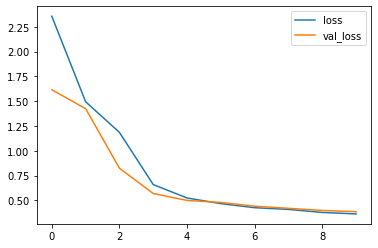

In [22]:
plt.plot(hist.history['loss'],label = 'loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

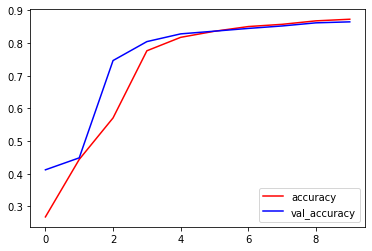

In [24]:
plt.plot(hist.history['accuracy'],label = 'accuracy' , color = 'r')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy',color = 'b')
plt.legend()
plt.show()

In [25]:
test_loss,test_accuracy = model.evaluate(Xt,Yt)

313/313 [==============================] - 8s 24ms/step - loss: 0.4021 - accuracy: 0.8605


In [26]:
answers = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [50]:
# #testing for a single image
test_img = Xt[107].reshape(1,28,28,1)
predictions = model.predict(test_img)

In [51]:
import numpy as np
predictions = np.argmax(predictions)
print (predictions)

9


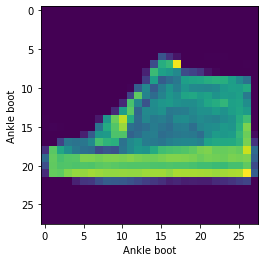

In [52]:
plt.imshow(Xt[107])
plt.xlabel(answers[np.argmax(Yt[107])])
plt.ylabel(answers[predictions])
plt.show()
